<a href="https://colab.research.google.com/github/JuelGeorge/Adaptive_BCI_2D/blob/main/ErrPGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow tensorflow-gpu matplotlib tensorflow-datasets ipywidgets


asdf

In [1]:
import tensorflow as tf


In [ ]:
!pip list

In [2]:
# Bringing in tensorflow
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
# Brining in tensorflow datasets for fashion mnist 
import tensorflow_datasets as tfds
# Bringing in matplotlib for viz stuff
from matplotlib import pyplot as plt

Some preliminary imports

In [154]:
# Bring in the sequential api for the generator and discriminator
from tensorflow.keras.models import Sequential
# Bring in the layers for the neural network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D, UpSampling1D, Conv1D,Resizing, BatchNormalization, MaxPooling2D,ReLU,Softmax

Generator model-

In [160]:
def build_generator(): 
    model = Sequential()
    
    # Takes in random values and reshapes it to 7x7x128
    # Beginnings of a generated image
    model.add(Dense(1*4*64, input_dim=64))
    model.add(BatchNormalization())
    
    model.add(LeakyReLU(0.2))
    model.add(Reshape((1,4,64)))
    model.add(Conv2D(64,4,padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization())
    
    
    model.add(UpSampling2D(size=(1,2)))
    model.add(Conv2D(64,4,padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization())
   
    
    model.add(UpSampling2D(size=(1,2)))
    model.add(Conv2D(64,4,padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization())
   

    model.add(UpSampling2D(size=(1,2)))
    model.add(Conv2D(64,4,padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization())
  

    model.add(UpSampling2D(size=(1,2)))
    model.add(Conv2D(64,4,padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization())


    model.add(UpSampling2D(size=(1,2),))
    model.add(Conv2D(64,4,padding='same',activation='tanh'))
    model.add(BatchNormalization())
 
   
    return model

Instanstiate the generator model and view a layer by layer summary

In [161]:
gen=build_generator()
gen.summary()

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               16640     
                                                                 
 batch_normalization_27 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 leaky_re_lu_31 (LeakyReLU)  (None, 256)               0         
                                                                 
 reshape_1 (Reshape)         (None, 1, 4, 64)          0         
                                                                 
 conv2d_46 (Conv2D)          (None, 1, 4, 64)          65600     
                                                                 
 leaky_re_lu_32 (LeakyReLU)  (None, 1, 4, 64)          0         
                                                     

Generate 4 ErrP datasets. 64 Channels x 128 samples for each dataset.

In [162]:
import numpy as np
img=gen.predict(np.random.randn(4,64,1))
img
img.shape

1/1 [==============================] - 1s 573ms/step


(4, 1, 128, 64)

In [163]:
img.shape

(4, 1, 128, 64)

First Errp Dataset, channel 2-

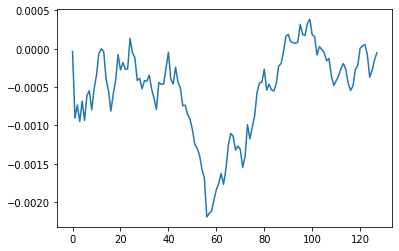

In [ ]:
plt.plot(img[0,0,:,1])

In [157]:
def build_discriminator(): 
    model1 = Sequential()
    
    model1.add(MaxPooling2D(pool_size=(2,32),input_shape = (1,128,64),padding='same'))
    model1.add(Conv2D(64,4,padding='same'))
   
   
    model1.add(UpSampling2D(size=(1,2)))
    model1.add(Conv2D(64,4,padding='same'))
    model1.add(LeakyReLU(0.2))
    model1.add(BatchNormalization())
    
    model1.add(UpSampling2D(size=(1,2)))
    model1.add(Conv2D(64,4,padding='same'))
    model1.add(LeakyReLU(0.2))
    model1.add(BatchNormalization())
    
    model1.add(UpSampling2D(size=(1,2)))
    model1.add(Conv2D(64,4,padding='same'))
    model1.add(LeakyReLU(0.2))
    model1.add(BatchNormalization())

    model1.add(UpSampling2D(size=(1,2)))
    model1.add(Conv2D(64,4,padding='same'))
    model1.add(LeakyReLU(0.2))
    model1.add(BatchNormalization())
    
    model1.add(Flatten())
    
    model1.add(Dense(128))
    model1.add(ReLU())

    model1.add(Dense(2))
    model1.add(Softmax())



   
    model1.build()
    return model1

In [158]:
discriminator = build_discriminator()
discriminator.summary()

Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling2d_48 (MaxPoolin  (None, 1, 4, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 1, 4, 64)          65600     
                                                                 
 up_sampling2d_33 (UpSamplin  (None, 1, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 1, 8, 64)          65600     
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 1, 8, 64)          0         
                                                                 
 batch_normalization_23 (Bat  (None, 1, 8, 64)       

In [164]:
discriminator.predict(img)

1/1 [==============================] - 0s 189ms/step


array([[0.50000936, 0.49999064],
       [0.5000051 , 0.49999493],
       [0.5000086 , 0.49999145],
       [0.5000074 , 0.49999264]], dtype=float32)